<a href="https://colab.research.google.com/github/janchorowski/dl_uwr/blob/summer2021/Assignments/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: Word Embeddings [4p]

Many natural language processing tasks requrie continuous representations for words.
[Word embeddings](https://en.wikipedia.org/wiki/Word_embedding) are mappings from a discrete
space to real-valued vectors. Word embeddings might be trained with neural networks,
either as a by-product of other tasks (e.g., language modeling, neural machine translation),
or with networks designed specifically for the word embedding task.

Two problems associated with training neural word embeddings are related to the speed of training:
(a) large volume of data, on which the network has to be trained on, and (b) time required to compute
output probability distribution over large vocabularities.

One of the most popular architectures for training word embeddings is called Word2vec [[1]()], [[2]()]. It builds on the idea that semantics of a word can be defined through the contexts,
in which the word appears in the sentence.

Let $w_1, w_2,\ldots,w_N$ be an $N$-word sentence in a natural language.
We define a context of a word $w_l$ a list of $n$ preceeding and following words
$w_{l-n},\ldots,w_{l-1},w_{l+1},\dots,w_{l+n}$.

The underlying assumption is that similar words appear in similar contexts.
For instance, words *Poland* and *Monaco* are similar in a sense, that they are singular nouns
describing abstract concepts of existing, european countries.
We can convince ourselves by looking at exceprts from Wikipedia articles
on Poland and Monaco:

* Despite **Monaco's independence** and separate foreign policy
* aimed to preserve **Poland's independence** and the szlachta's

* **Monaco joined the** Council of Europe in 2004
* **Poland joined the** Schengen Area in 2007

* nearly one-fifth **of Poland's population** – half of them
* Christians comprise a total of 83.2% **of Monaco's population**.

### Tasks
You will use word vectors pre-computed on a large dataset.
1. **[1p]** It has been observed, that word embeddings allow to perform semantic arithmetic where, for instance

    **king** - **man** + **woman** ~= **queen**

    This *analogy* task is often used as a quality measure of word embeddings. Load word embeddings and compute
    their analogy score on a dataset of analogous pairs, expressed as an accuracy of accuracy of predicting a pair
    item (**queen** in the example above). Specifically, compare `FastText` and `Word2vec` word embeddings.
    
2. **[1p]** Word embedding capture approximate semantics. Under an assumption that words of similar semantics
    exist in different languages, a mapping $W: \mathbb{R}^{300}\mapsto\mathbb{R}^{300}$ might be constructed that
    translates word embeddings between languages. It has been shown that such ortonormal mappings allow to express
    approximate, bilingual dictionaries. In addition, non-linear mappings do not offer additional benefits.

    Given a simple English-Polish dictionary of word pairs (sourced from Wikitionary)
    find an orthonormal mapping $W$ between English and Polish `FastText`
    word embeddings using Procrustes analysis.

3. **[1p]** Word embeddings can often be nicely visualized.
    Make a 2-D `PCA` plot of word embeddings for countries and their capital cities
    for `FastText` or `Word2vec`. Connect each country with its capital city with a line segment.
    Can you see any regularities?
    
4. **[1p]** Plot 400 roughly most frequent words' embeddings (either `FastText` or `Word2vec`) in 2-D with `PCA`.
    Skip stop words, punctuations, artifact words, etc. You can be imprecise and use heuristics
    (e.g., select words than are at lest 3 charactes long).
    Can you see any regularities? Another method of making meaningful visualizations is `t-SNE`.
    
    Make another 2-D visualization, this time using `t-SNE`. Visualizations with `t-SNE` are obtained
    with gradient descent. Try to tweak optimization parameters to get lower optimization error,
    than the one with default parameters.
    Can you see any regularities this time?

# Problem 2: kNN Talker [11p+]

In this exercise you will build a simple chatbot that uses distributed representations of words and sentences to perform a nearest neighbor selection of responses.

We have collected two sets of data:
- `./reddit_pairs.txt` of excerpts of [Reddit](https://www.reddit.com/) conversations,
- `./hackernews_pairs.txt` of excertps from [Hackernews](https://news.ycombinator.com/).

The two corpuses are formatted as `tab`-separated pairs of utterances: a `prompt` and a `response`. Successive lines belong to different conversations.

The main idea of the chatbot is to build a representation of the user `input` and of all `prompts` from the corpus. Then select the best (or randomly one of the top few) matches and print the associated `response`.

The key to get the bot working is to create good sentence representations. We will try:
- averaging word embeddings
- using sentence models such as BERT.

### Warning:
The Reddit corpus may contain abusive language, it was not heavily cleaned.

### Tasks
The code below is a starting point, but you can develop you own. The following list suggests some actions to try, along with the points that reflect our subjective hardness. The exercise is worth 6 regular points (i.e. the report, word embedding-based model and BERT-based model), anything on top of it will be counted as a bonus.

1. [2p] Type in a Markdown cell a report of your actions, what did you try, why, what was the result. Show exemplary conversations (they must be probable under your model). Cherry-pick 3 nice dialogues.
2. [2p] Represent sentences by averaging their word vectors. Properly handle tokenization (you can use regular expressions or e.g. `nltk` library). Describe how you handle lower and upper cased words. Try a few nearest neighbor selection methods (such as euclidean or cosine distance). See how embedding normalization affects the results (you can normalize individual word vectors, full sentence vectors etc.).
3. [2p] Use the [transformers](https://huggingface.co/transformers) package to load a pretrained BERT model. Use it to represent sentences by e.g. averaging the activations in the last layer.
4. [1p] Incoportate context: keep a running average of past conversation turns.
5. [1p] Do data cleaning (including profanieties), finding rules for good responses.
6. [1p] Try mixing different sentence representation techniques.
7. [2p] Try to cluster responses to the highest scored prompts. Which responses are more funny: from the largerst or from the smallest clusters?.
8. [1p+] Implement your own enhancements.


# Starter code

In [1]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.

# Download word vectors
!pip install -q gdown httpimport
![ -e word2vec.tar.xz ] || gdown 'https://drive.google.com/uc?id=1v6D8IjYVFlonhQuN_J3PML5KSVQSpbED' -O word2vec.tar.xz
![ -d word2vec ] || tar Jxf word2vec.tar.xz

# Download conversation corpuses
![ -e  hackernews_pairs.txt ] || gdown 'https://drive.google.com/uc?id=10cp2maNp1suzc5BaFQwDJr2GTKXHQOz_' -O hackernews_pairs.txt
![ -e  reddit_pairs.txt ] || gdown 'https://drive.google.com/uc?id=1Uf0Xl9aqQVBBpOwhYTV7iWCwj95FDqtL' -O reddit_pairs.txt

In [2]:
# Huggingface Transformers implementation
!pip install -q tqdm boto3 requests regex sentencepiece sacremoses nltk gensim tabulate
!pip install -q transformers

In [3]:
%matplotlib inline

In [4]:
import collections

import codecs

import numpy as np
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import distance

import nltk
import sklearn
nltk.download('punkt')

import pprint
import gensim

import io
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt

import torch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import tabulate

[nltk_data] Downloading package punkt to /Users/denys/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/nz/sz0gtb0n4990pkkc9bgjt7580000gn/T/ipykernel_7169/3411360246.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## 1.1: Analogies

In [5]:
# Word embeddings assign a vector to each word. To use them we need three things:
# 1. the embeddings themselves
# 2. a dictionary from words to their embedding ids
# 3. an inverse dictionary

Embedding = collections.namedtuple(
    'Embedding',
    ['vec', 'word2idx', 'idx2word'])

In [6]:
def load_vecs_npy(base_path):
    """Load small embeddings in .npy format."""
    vec = np.load(base_path + '.npy')
    idx2word = [l.strip() for l in codecs.open(
                      base_path + '.txt', 'r', 'utf-8')]
    word2idx = {w:i for (i,w) in enumerate(idx2word)}
    return Embedding(vec, word2idx, idx2word)

In [7]:
# Load top 200k word embeddings: Word2vec and FastText
word2vec = load_vecs_npy('word2vec/word2vec_GoogleNews_200k')
ftext = load_vecs_npy('word2vec/fasttext_wikien_200k')

In [8]:
def load_analogies():
    '''Load tuples of analogies, e.g., (man, woman, king, queen)'''
    questions_path = 'word2vec/questions-words.txt'
    analogies = [l.strip().split() for l in open(questions_path, 'r') \
                 if not l.startswith(':')]
    return analogies

In [9]:
word2vec[0].shape

(200000, 300)

In [10]:
def eval_analogies(vecs, analogies):
    """
    Compute the accuracy on the analogy task.
    
    In the task, quadruples of words are given (q1, q2, r1, r2).
    The words q1 and q2 are bound by a relation. The words r1 and r2 
    are bound by the same relation. The task is to predict r2 knowing words
    q1, q2, and r1.
    
    Example:
    Quadruple [King, Queen, Man, Woman] yields the question
    King is to Queen as Man is to ????
    
    Args:
        word_vecs: Embeddings tupes
        analogies: list of quadruples: (q1, q2, r1, r2)
        
    Returns:
        percentage of correct answers
    """
    indexes = [[vecs.word2idx.get(w, None) for w in tupl] \
                for tupl in analogies]
    indexes = [tupl for tupl in indexes \
               if all([v is not None for v in tupl])]
    # indexes holds quadruples of ints giving the ids of words from our vocab.
    indexes = np.asarray(indexes)
    print('Got vocab for %d/%d pairs' % (indexes.shape[0], len(analogies)))
    
    # Extract the vectors for the query words
    q1 = vecs.vec[indexes[:, 0]]
    q2 = vecs.vec[indexes[:, 1]]
    r1 = vecs.vec[indexes[:, 2]]
    
    # Extractr the word IDs for the correct answers
    r2_inds = indexes[:, 3]

    
    # Compute the approximate location of word r2 as r2 = r1 + (q2 - q1)
    # Find the word closest to this location using cosine distance.
    # Return it's id and compute the accurracy.
    #

    r2_pred = r1 + (q2 - q1)
    
    # Normalize length and compute dot product between r2_pred and word_vecs
    # to get cosine distance
    r2_pred_norm = r2_pred / np.linalg.norm(r2_pred)
    vecs_norm = vecs.vec / np.linalg.norm(vecs.vec, axis=1, keepdims=True)
    
    # Compute in chunks to save memory
    r2_pred_inds = np.concatenate([np.argmax(r2_pred_norm[i:i+1000].dot(vecs_norm.T), axis=1) \
                                   for i in range(0, r2_pred.shape[0], 1000)])
    return 100.0 * (r2_pred_inds == r2_inds).sum() / r2_inds.shape[0]

In [11]:
# Load analogy tuples, e.g., (man, woman, king, queen)
analogies = load_analogies()

# Some are uppercased geographical names (and FastTexts are lowercased)
analogies_lower = [[w.lower() for w in tupl] for tupl in analogies]

print(analogies[0])
print(analogies_lower[0])

['Athens', 'Greece', 'Baghdad', 'Iraq']
['athens', 'greece', 'baghdad', 'iraq']


In [12]:
# Keep in mind that the vocab is restricted to 200k most freq words
# (in the training corpus!)
print('FastText analogy task accuracy:')
print('-------------------------------')
# Fast-text was trained on lowercased text only
print(eval_analogies(ftext, analogies_lower), '% correct')

print('\nWord2vec analogy task accuracy:')
print('-------------------------------')
# Word2vec has case information
print(eval_analogies(word2vec, analogies), '% correct')

FastText analogy task accuracy:
-------------------------------
Got vocab for 19420/19544 pairs
16.374871266735326 % correct

Word2vec analogy task accuracy:
-------------------------------
Got vocab for 18783/19544 pairs
20.859287653729435 % correct


## 1.2: translation through alignment of vector spaces

In [13]:
# We're need Polish embeddings
ftext_pl = load_vecs_npy('word2vec/fasttext_wikipl_200k')

# Load a simple wikitionary-based dict of word pairs
en_pl = [l.strip().split('\t') for l in codecs.open(
    'word2vec/word2vec_en_pl', 'r', 'utf-8') if not '<UNK>' in l]
en_pl = {t[0]:t[1] for t in en_pl if len(t) == 2}

# Keep those, for which we have embeddings
en_pl = {en:pl for (en,pl) in en_pl.items() \
         if en in ftext.word2idx and pl in ftext_pl.word2idx}
print('Dictionary size:', len(en_pl))
print('good --', en_pl['good'])

Dictionary size: 750
good -- dobro


In [14]:
# Select word embeddings for dictionary words
en_words = sorted(en_pl.keys())
V_en = ftext.vec[[ftext.word2idx[w] for w in en_words]]
V_pl = ftext_pl.vec[[ftext_pl.word2idx[en_pl[w]] for w in en_words]]
print(V_en.shape, V_pl.shape)

(750, 300) (750, 300)


In [15]:
# Find an orthogonal transformation from V_en to V_pl.
# which minimizes square reconstruction error
W = orthogonal_procrustes(V_en, V_pl)[0]

In [16]:
# Translates english word to the polish ones
def translate(W, v, vecs2):
    v = W.T @ v
    
    v_norm = v / np.linalg.norm(v)
    vecs_norm = vecs2.vec / np.linalg.norm(vecs2.vec, axis=1, keepdims=True)
    
    idx = np.argmax(v_norm.dot(vecs_norm.T))
    
    return vecs2.idx2word[idx]

# Select random, fairly frequent words not from the dictionary
tr_words = [i for i in np.random.randint(1000, 2000, 100) \
            if ftext.idx2word[i] not in en_pl]
tr_words = tr_words[:20]

rows = [[ftext.idx2word[i], translate(W, ftext.vec[i], ftext_pl)] \
         for i in tr_words] 
print(tabulate.tabulate(rows))

------------  -------------
workers       robotnicy
institutions  instytucje
behind        plecami
daily         codzienny
constructed   budowany
uploaded      fotki
mar           artykuły
constructed   budowany
programs      program
managed       zdołali
cities        miasto
pakistan      kraj
journal       publikacja
operating     instalowanie
pro           lojalnościowy
uploaded      fotki
knowledge     wiedzę
formerly      obecnie
typically     zwykle
maryland      niemann
------------  -------------


## 1.3: PCA

In [17]:
capitals = [l.strip().split('\t') for l in codecs.open('word2vec/countries_capitals', 'r', 'utf-8')]
capitals = {country:capital for (country,capital) in capitals}

# Select those present in Word2vec vocab
capitals = {k:v for (k,v) in capitals.items() \
            if k in word2vec.word2idx and v in word2vec.word2idx}

# Flatten the array to have a list of [country, capital, country, capital, ...]
geo = [e for pair in capitals.items() for e in pair]
print(len(geo) // 2, 'pairs', geo[:6])

131 pairs ['Afghanistan', 'Kabul', 'Albania', 'Tirana', 'Algeria', 'Algiers']


In [18]:
geo_inds = [word2vec.word2idx[w] for w in geo]
geo_vecs = word2vec.vec[geo_inds]
print(geo_vecs.shape)

(262, 300)


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(geo_vecs)

geo_vecs_transformed = pca.transform(geo_vecs)

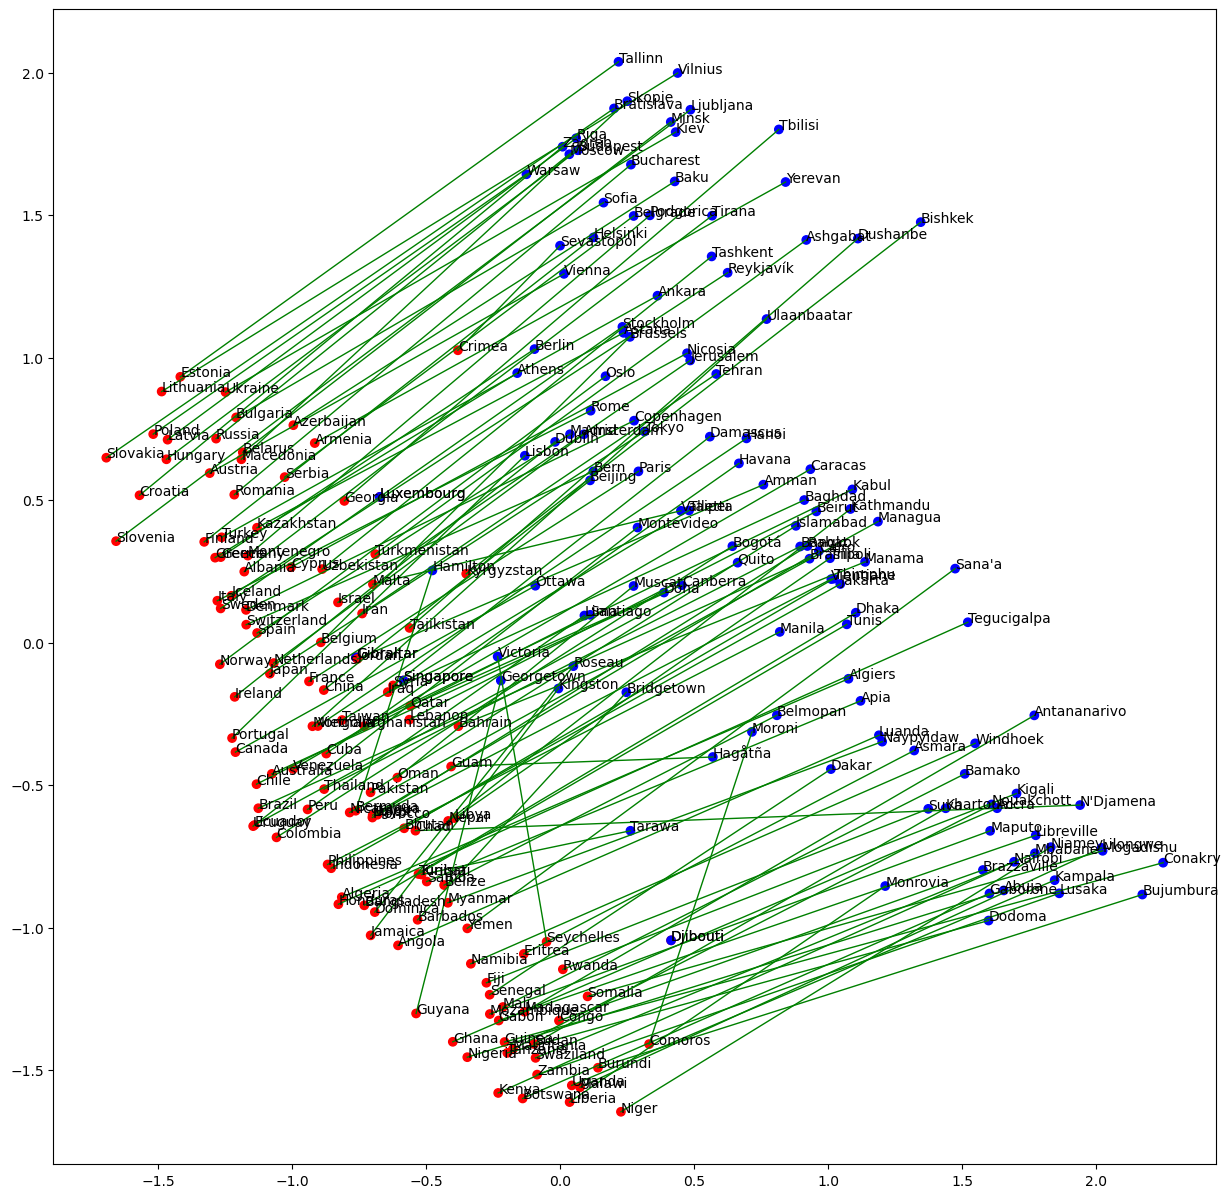

In [20]:
plt.figure(figsize=(15, 15))

for i, (country, capital) in enumerate(list(capitals.items())[:-1]):
    coords = geo_vecs_transformed[i*2 : i*2+2]
    colors = ['red', 'blue']

    plt.scatter(*coords.T, c=colors)
    plt.plot(*coords.T, color='green', linewidth=1)

    for (x, y), location in zip(coords, [country, capital]):
        plt.annotate(location, (x, y), fontsize=10)
        
plt.show()


## 1.4: PCA vs t-SNE on frequent words & profanities

In [94]:
""" 
Select words starting from the 200th to ommit stop words, which have at least 3 chars.
We will also load some of the profanities so we can see that their embeddings located in one area.
    
"""


with open("profanities.txt", "r") as f: profanities = f.read().split('\n')

top_words = np.array([w for (i,w) in enumerate(ftext.idx2word) \
             if i > 200 and len(w) >= 3][:200] + profanities)
top_inds = [ftext.word2idx[w] for w in top_words]
top_words_vecs = ftext.vec[top_inds]

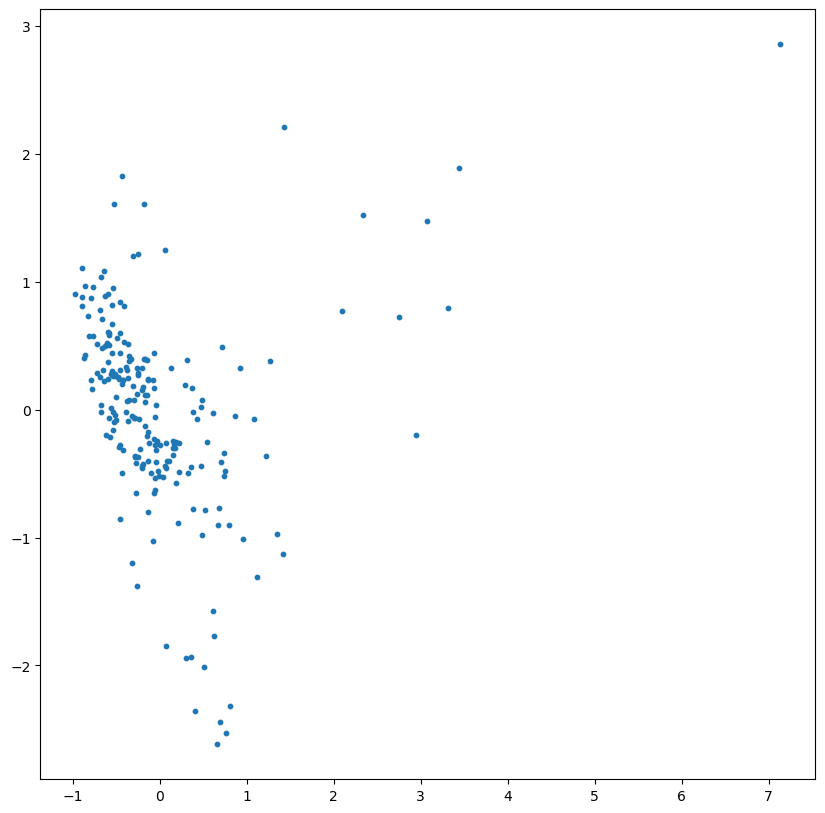

In [95]:
pca = PCA(n_components=2)

vecs_transformed = pca.fit_transform(top_words_vecs)

plt.figure(figsize=(10, 10))
plt.scatter(*vecs_transformed.T, s=10)

In [96]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=10, n_iter=10000, random_state=42)

vecs_transformed = tsne.fit_transform(top_words_vecs)
error = tsne.kl_divergence_

print('t-SNE error:', error)


t-SNE error: 0.9731676578521729


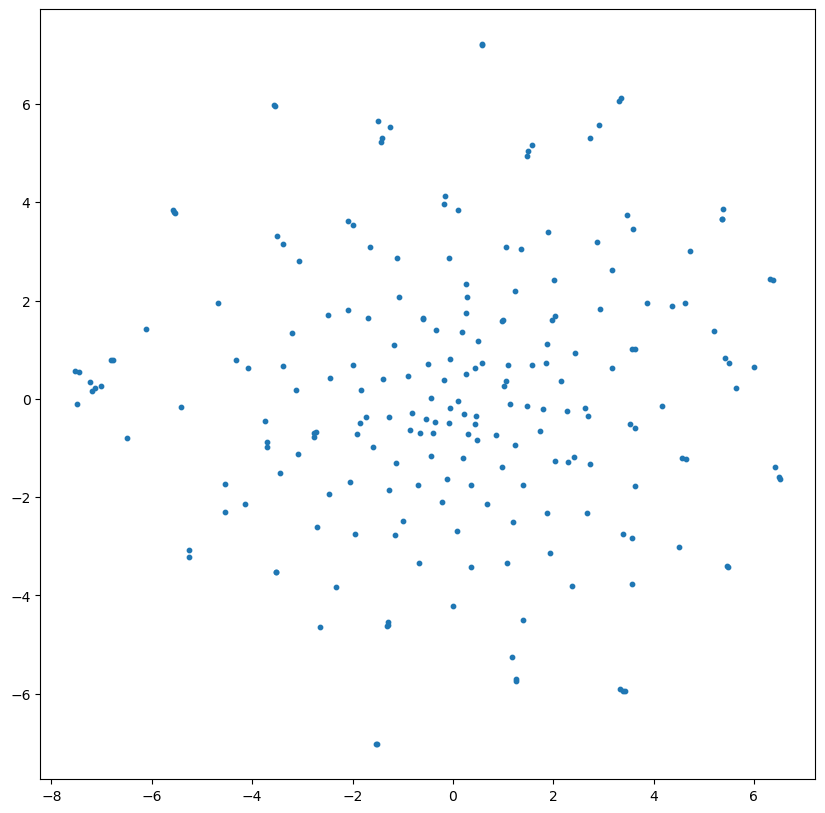

In [97]:
plt.figure(figsize=(10, 10))
plt.scatter(*vecs_transformed.T, s=10)

In [98]:
def get_elements_by_cluster(cluster_number, kmeans):
    cluster_labels = kmeans.labels_
    idxs = [i for i, label in enumerate(cluster_labels) if label == cluster_number]
    return np.array(idxs)

/opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

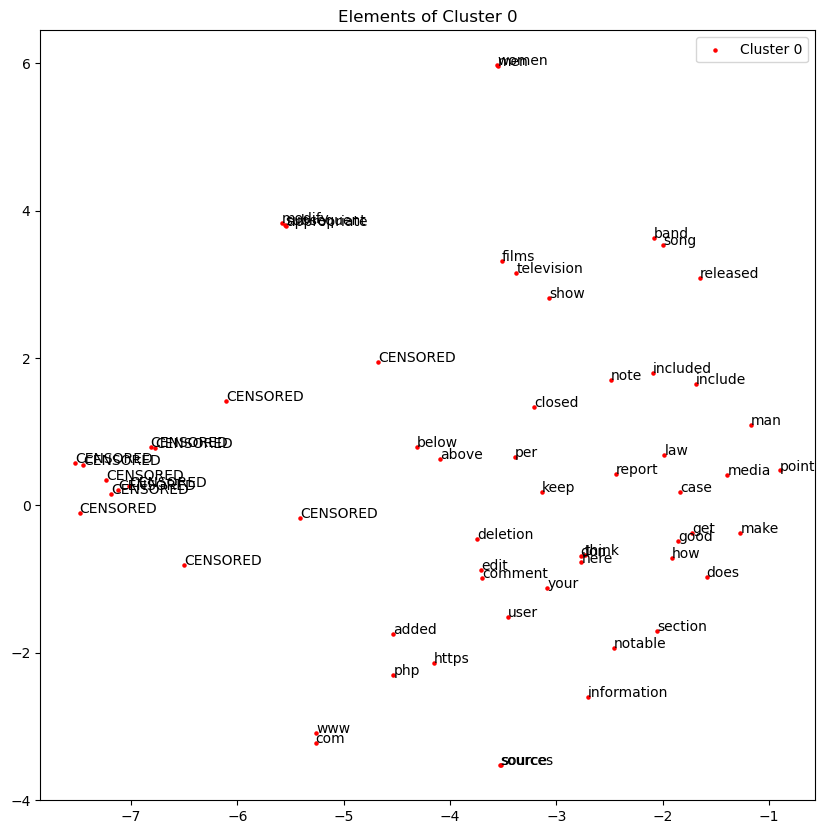

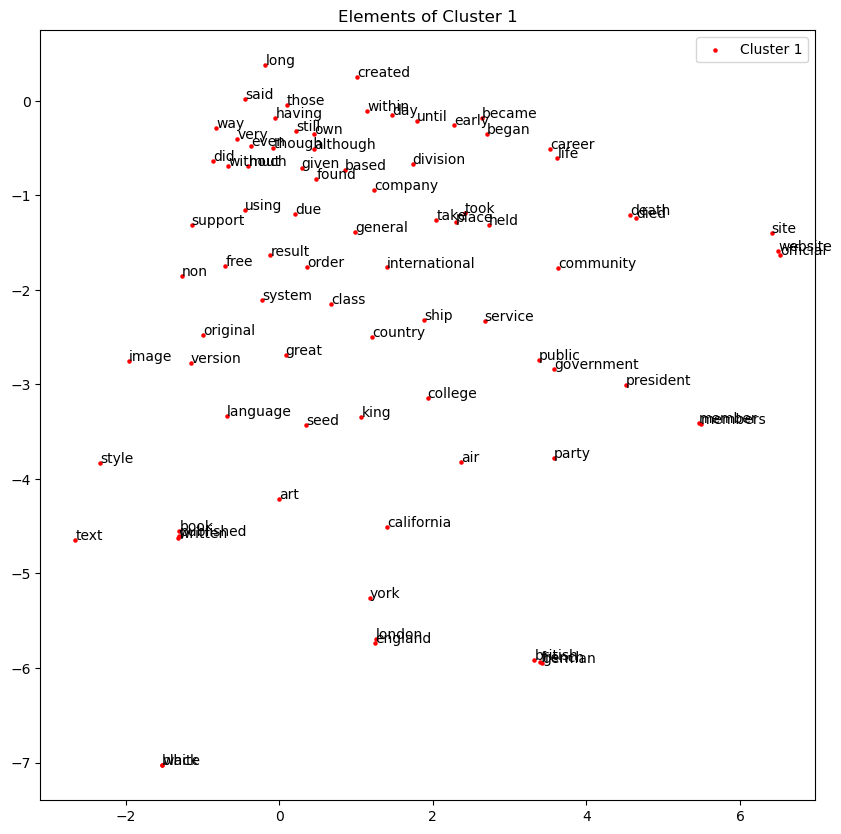

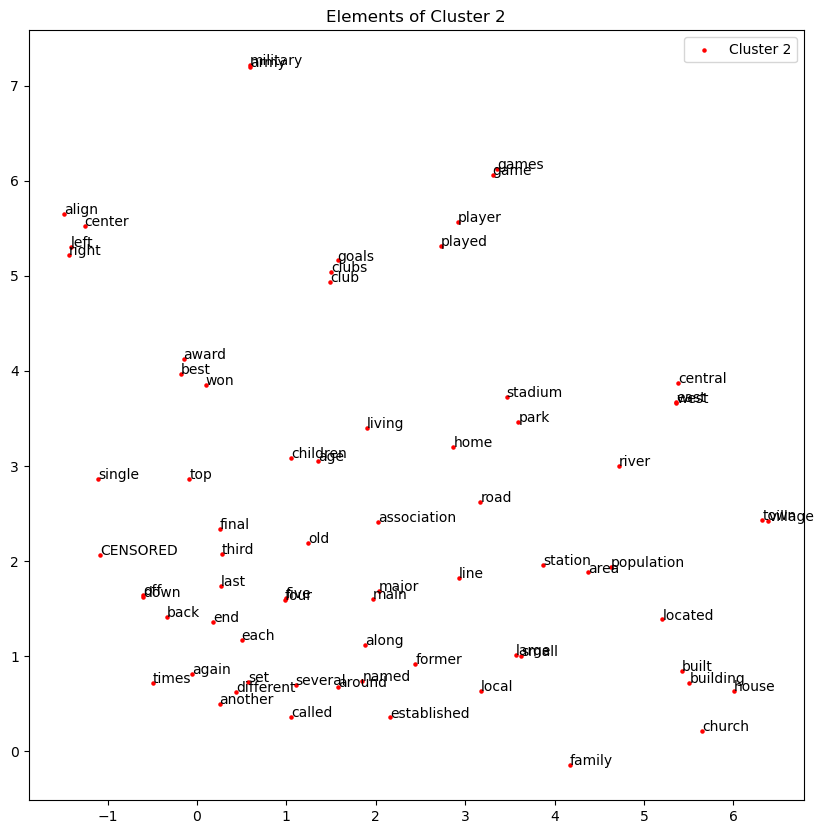

In [99]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(vecs_transformed)

num_clusters_to_plot = 3

plt.figure(figsize=(10, 10))

for cluster in range(num_clusters_to_plot):
    plt.figure(figsize=(10, 10))
    idxs = get_elements_by_cluster(cluster, kmeans)
    coords = vecs_transformed[idxs]
    words = top_words[idxs]
    plt.scatter(coords[:, 0], coords[:, 1], label=f"Cluster {cluster}", s=5, c='red')
    for i, word in enumerate(words):
        if word in profanities:
            plt.annotate('CENSORED', (coords[i, 0], coords[i, 1]))
        else:
            plt.annotate(word, (coords[i, 0], coords[i, 1]))
    
    plt.title(f"Elements of Cluster {cluster}")
    plt.legend()
    plt.show()



## Problem 2

In [21]:
prompts = []
responses = []
err_lines = []
with open('./reddit_pairs.txt') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        line = line.split('\t')
        if len(line)!=2:
            err_lines.append(line)
        else:
            prompts.append(line[0])
            responses.append(line[1])
print(f"Failed to parse the following {len(err_lines)} lines: {err_lines}") 
print(f"Sample fialogue pairs: \n{pprint.pformat(list(zip(prompts[:15], responses)))}")

Failed to parse the following 7 lines: [['1602 link karma', '11259 comment karma', 'damn you got almost all your karma here'], ['lol'], ['50$ skin pls'], ['omg his posting how'], ['11', 'inches to be precise :)', 'holy shit your girl has found herself a fuckin unicorn!'], ['( ) no fuk'], ['looks like you post on multiple porn subreddits']]
Sample fialogue pairs: 
[('show', 'me your moves?'),
 ('haters gonna hate', 'hate'),
 ('i think he is doing sarcasm.',
  'hahaha, you stupid twat, go and have a wank'),
 ('i can do 38 for void head :)', '39k man cant go for 38k'),
 ('brb getting hit by a car', 'did your mate, also buy you a computer?'),
 ('reason ?', 'to pay for bandwidth to troll people online.'),
 ('*155k notes...*', 'welcome to tumblr'),
 ('is it just me or is this pitched up?',
  'might be to avoid copyright issues.'),
 ('no chapter this week bud :(', '**cough*'),
 ("that's gonna come back for a block in the back",
  "but it doesn't matter. fuck this game. connor cook playing ful

In [100]:
class BasicEncoder:
    def encode(self, sentence):
        # this is a base class!
        raise NotImplementedError

    def encode_corpus(self, sentences):
        ret = [self.encode(sentence) for sentence in tqdm(sentences)]
        return np.vstack(ret)

## Done
-  ✅ Basic context implementation using weighed average of past values
-  ✅ Handling lower/uppercase letters is done by checking the original word, that the lovercased one and, if not found, returning zero vector. (TODO? average vector instead zero)
-  ✅✅ Implemented encoder that uses BERT pretrained model. Takes couple hours to process the whole corpus though.
-  ✅ Implemented cosine/euclidean distance
-   Different normalization techniques
-  ✅ Data cleaning. We already saw that the offensive words tend to lie in the same area. Trained a helper logreg model that predicts whether the gives embedding corresponds to a profanity or not. 
-  ✅✅ Clustering responses. Smaller clusters are funnier.
-  ✅ Implemented adjustable randomness of responses
-  ✅✅ Added some cherrypicks and written what I did down. 

In [101]:
class OneHotEncoder(BasicEncoder):
    def __init__(self, sentences):
        self.vectorizer = sklearn.feature_extraction.text.CountVectorizer()
        self.vectorizer.fit(sentences)
    
    def encode(self, sentence):
        return self.vectorizer.transform([sentence])[0]

    def encode_corpus(self, sentences):
        # Override because sklearn already works on batches
        encodings = self.vectorizer.transform(sentences)
        # Note: this code needs to handl the scipy sparse matrix
        # which has subtle differences with numpy ndarrays
        norms = np.array((encodings.power(2)).sum(1))**0.5
        encodings = encodings.multiply(1.0 / norms)
        return encodings

In [105]:
from sklearn.linear_model import LogisticRegression
x = top_words_vecs
y = result_array = np.concatenate((np.zeros(200), np.ones(len(profanities))))

model = LogisticRegression()
model.fit(x, y)
model.predict(ftext.vec[ftext.word2idx['']].reshape(1,-1))

def offensive(word):
    if word in ftext.word2idx:
        return model.predict(ftext.vec[ftext.word2idx[word]].reshape(1,-1)) > 0.5
    else:
        return False

In [103]:
class Word2VecEncoder(BasicEncoder):
    def __init__(self, vecs):
        self._vecs = vecs

    def _get_vec(self, word):
        idx = self._vecs.word2idx.get(word) or self._vecs.word2idx.get(word.lower())
        return self._vecs.vec[idx] if idx else np.zeros(300)

    def encode(self, sentence):
        ret = np.zeros(self._vecs.vec.shape[1])
        for token in nltk.tokenize.word_tokenize(sentence):
            word_vec = self._get_vec(token)
            ret += word_vec
        ret /= (np.linalg.norm(ret) + 1e-5)
        return ret

In [104]:
encoder = Word2VecEncoder(word2vec)
encodings = encoder.encode_corpus(prompts)

  0%|          | 0/72807 [00:00<?, ?it/s]

In [42]:
from transformers import BertTokenizer, BertModel
import torch

class BertEncoder(BasicEncoder):
    def __init__(self):
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.model = BertModel.from_pretrained('bert-base-uncased')

    def encode(self, sentence):
        tokens = self.tokenizer.tokenize(sentence)
        input_ids = self.tokenizer.convert_tokens_to_ids(tokens)
        input_ids = torch.tensor([input_ids])
        
        with torch.no_grad():
            outputs = self.model(input_ids)
            ret = outputs.last_hidden_state.mean(dim=1)
            
        ret = ret.numpy()
        ret /= (np.linalg.norm(ret) + 1e-5)
            
        return ret



In [43]:
encoder = BertEncoder()
encodings = np.load('BERT-encodings.npy')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [89]:
import numpy as np
from sklearn.cluster import KMeans

# alpha - how fast do memories vanish

def gen_answer(prompt, memory, alpha=1, sigma=0, distance='cosine', clusters=0):
    enc = encoder.encode(prompt) * alpha# + memory * (1 - alpha)
    if distance == 'cosine':
        scores = (encodings @ enc.T).ravel()
    elif distance == 'euclidean':
        scores = -((encodings - enc) ** 2).sum(axis=1)
    else:
        raise Exception(f"Distance {distance} is not supported")

    top_idx = scores.argsort()[-20:][::-1]

    if clusters > 0:
        kmeans = KMeans(n_clusters=clusters)
        kmeans.fit(encodings[top_idx])
        labels = kmeans.labels_
        print(f"{clusters} clusters:")
        for i in range(clusters):
            flt = top_idx[np.where(labels == i)[0]]
            print(f"  cluster {i}:")
            for i in flt:
                p, r, s = prompts[i], responses[i], scores[i]
                def offset(s, l=45):
                    return s[:l] + (l - len(s)) * ' '
                print(f"  {offset(p)} | {offset(r)} | {s}")
                
    i = abs(round(np.random.normal(0, sigma)))
    i = min(i, len(top_idx) - 1)

    return responses[top_idx[i]], enc


def greet():
    print("Chatbot started.")


def chat():
    memory = np.zeros_like(encoder.encode('todo'))
    while True:
        prompt = input("User: ")
        if prompt == 'bye':
            break
        answer, memory = gen_answer(prompt, memory, alpha=0.7, sigma=1, distance='euclidean', clusters=5)
        print(f"Chatbot: {answer}\n")


def main():
    greet()
    chat()


main()


Chatbot started.


User:  hey g wassup


/opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 clusters:
  cluster 0:
  alright senpai g0                             | ups...                                        | -0.3764321804046631
  fn huntsman slaughter 135k                    | screens ?                                     | -0.41097110509872437
  an ssd with intel hd 3000 laptop wont make yo | yes but my ssd, gtx 9700 and intel i7 4790k w | -0.4172493815422058
  cluster 1:
  hey man                                       | it's cold down here                           | -0.36920833587646484
  hey robin                                     | hey man                                       | -0.39171266555786133
  pm me                                         | sent                                          | -0.4015783369541168
  pm me                                         | 3some?                                        | -0.4015783369541168
  cluster 2:
  thats deep brah                               | tell me more                                  | -0.39442336559295654
 

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/nz/sz0gtb0n4990pkkc9bgjt7580000gn/T/ipykernel_7169/2443911334.py:56 in <module>     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/nz/sz0gtb0n4990pkkc9bgjt7580000gn/T/ipykernel_7169/2443911334.py'                  │
│                                                                                                  │
│ /var/folders/nz/sz0gtb0n4990pkkc9bgjt7580000gn/T/ipykernel_7169/2443911334.py:53 in main         │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/nz/sz0gtb0n4990pkkc9bgjt7580000gn/T/ipykernel_7169/2443911334.py'                  │
│                                                                                                  │
│ /var/folders/nz/sz0gtb0n4990pkkc9bgjt7580000gn/T/ipykernel_7169/2443911334.py:44 in chat         │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/nz/sz0gtb0n4990pkkc9bgjt7580000gn/T/ipykernel_7169/2443911334.py'                  │
│                                                                                                  │
│ /opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.9/site-packages/ipykernel/kernelbase.p │
│ y:1191 in raw_input                                                                              │
│                                                                                                  │
│   1188 │   │   if not self._allow_stdin:                                                         │
│   1189 │   │   │   msg = "raw_input was called, but this frontend does not support input reques  │
│   1190 │   │   │   raise StdinNotImplementedError(msg)                                           │
│ ❱ 1191 │   │   return self._input_request(                                                       │
│   1192 │   │   │   str(prompt),                                                                  │
│   1193 │   │   │   self._parent_ident["shell"],                                                  │
│   1194 │   │   │   self.get_parent("shell"),                                                     │
│                                                                                                  │
│ /opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.9/site-packages/ipykernel/kernelbase.p │
│ y:1234 in _input_request                                                                         │
│                                                                                                  │
│   1231 │   │   │   except KeyboardInterrupt:                                                     │
│   1232 │   │   │   │   # re-raise KeyboardInterrupt, to truncate traceback                       │
│   1233 │   │   │   │   msg = "Interrupted by user"                                               │
│ ❱ 1234 │   │   │   │   raise KeyboardInterrupt(msg) from None                                    │
│   1235 │   │   │   except Exception:                                                             │
│   1236 │   │   │   │   self.log.warning("Invalid Message:", exc_info=True)                       │
│   1237                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt: Interrupted by user

# Cherrypicks

```
alpha : 0.7
temperature : 1
distance: cosine
encoder: BERT
```

### 1
```
Chatbot started.
User:  hi
Chatbot: sup

User:  you have money?
Chatbot: i have at least 2 beer

User:  haha
Chatbot: dont start m8

User:  nah g, you good 
Chatbot: thanks you!

User:  wanna go hoop a bit?
Chatbot: will be in 10 mins :)

User:  where are you rn?
Chatbot: missouri

User:  im coming
Chatbot: now?

User:  ye
Chatbot: hm ok, thank you man ^^

User:  till we meet bro. dont forget the ball
Chatbot: lol nope
```

### 2

```
User:  wanna beans?
Chatbot: ...yes?

User:  here are 10 beans. hope you like them
Chatbot: i feel like it would just taste soggy... where would you get the pizza from?

User:  idk. you can go the pizza hut or sth
Chatbot: sure

User:  have a nice meal
Chatbot: accepted mate :) thankyou

```

### 3

```
User:  what you think of movie blade?
Chatbot: 40mm

User:  damn bro. are guns legal at your state?
Chatbot: yes it is

User:  ok. i wanna buy an ak for myself
Chatbot: kinky

User:  why is that
Chatbot: did it hurt?

User:  no, didn't buy yet 
Chatbot: then why comment....

User:  what gun you suggest you suggest
Chatbot: idk

User:  i also want to buy a binoculars
Chatbot: does amazon ship to mars with a technician?

User:  haha, you funny
Chatbot: haha, no problem
```